In [1]:
"""!pip install ffn
!pip install pypfopt
!pip install empyrical"""

'!pip install ffn\n!pip install pypfopt\n!pip install empyrical'

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import ffn

import numpy as np
import pandas as pd
#from empyrical import alpha_beta
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#import matplotlib.pyplot as plt
import warnings
#plt.style.use('dark_background')
#warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [4]:

folder = '../data/'
file = 'ffn.csv'
filename = f"{folder}{file}"
isin='LU0843168575'
filename

isins=['LU0280438135','LU0255977372','LU0133806785']

In [8]:
isins = ['LU0340554673','LU0474966677','LU0386875149']
filename = 'portfolios/ptf.csv'
prices = ffn.get(f'{isins[0]},{isins[1]},{isins[2]}', provider=ffn.data.csv, path=filename)
prices


,lu0340554673,lu0474966677,lu0386875149
index,,,
2022-01-04,531.61,181.92,416.75
2022-01-05,523.83,182.79,411.87
2022-01-06,513.12,178.68,400.76
2022-01-07,520.09,178.68,402.57
2022-01-11,515.84,177.91,394.94
...,...,...,...
2022-06-07,428.18,161.76,351.37
2022-06-08,437.47,161.89,354.28
2022-06-09,435.12,162.10,351.29


<IPython.core.display.Javascript object>

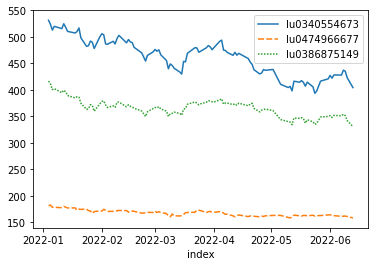

In [9]:
sns.lineplot(data=prices)
plt.show()

In [ ]:
#prices = ffn.get('TTWO, CCOEY, EA', start='2019-01-01')
#benchmark = ffn.get(f'{isins[0]}-level',provider=ffn.data.csv, path=filename)
#ax = prices.rebase().plot(figsize=(12,5))
#plt.show()

In [ ]:
prices

In [10]:
returns = prices.to_returns().dropna()

<IPython.core.display.Javascript object>

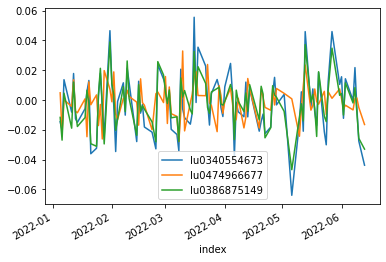

In [11]:
returns.plot()
plt.show()

In [13]:
stats = prices.calc_stats()
stats.display()

Stat                 lu0340554673    lu0474966677    lu0386875149
-------------------  --------------  --------------  --------------
Start                2022-01-04      2022-01-04      2022-01-04
End                  2022-06-13      2022-06-13      2022-06-13
Risk-free rate       0.00%           0.00%           0.00%

Total Return         -23.89%         -12.81%         -20.59%
Daily Sharpe         -1.99           -1.80           -2.19
Daily Sortino        -3.27           -2.82           -3.44
CAGR                 -46.38%         -26.87%         -40.92%
Max Drawdown         -25.95%         -13.22%         -20.59%
Calmar Ratio         -1.79           -2.03           -1.99

MTD                  -3.90%          -3.45%          -5.48%
3m                   -8.26%          -2.44%          -7.60%
6m                   -               -               -
YTD                  -23.89%         -12.81%         -20.59%
1Y                   -               -               -
3Y (ann.)            -    

<IPython.core.display.Javascript object>

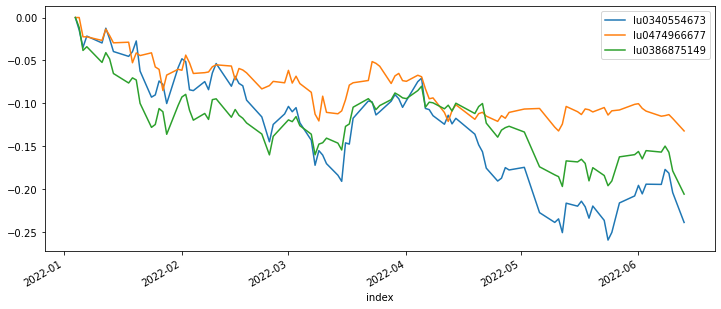

In [14]:
stats.prices.to_drawdown_series().plot(figsize=(12,5))
plt.show()

In [15]:
stats.prices.calc_cagr()

lu0340554673   -0.463792
lu0474966677   -0.268657
lu0386875149   -0.409214
dtype: float64

In [16]:
returns = prices.to_log_returns().dropna()
returns.calc_mean_var_weights().as_format('.2%')

lu0340554673    100.00%
lu0474966677      0.00%
lu0386875149      0.00%
dtype: object

In [17]:
returns.calc_erc_weights().as_format('.2%')

lu0340554673    22.79%
lu0474966677    48.19%
lu0386875149    29.02%
Name: erc, dtype: object

symbols = [f'{isin}-NAV']
for sym in symbols:
    stk = ffn.get(sym, provider=ffn.data.csv, path=filename)
    alpha, beta = alpha_beta(stk, benchmark)
    print(sym, beta)


In [19]:
returns = prices.pct_change()
weight = np.array([10,10,10])

t = np.sum(weight)
weights = weight/t
# mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)

print("Expected annualised return: " + str(portfolio_return*100))
print("Volatility: " + str(portfolio_std_dev*100))

Expected annualised return: -51.0
Volatility: 22.0


In [20]:
portfolio_return

-0.51

In [21]:
mean_daily_returns

lu0340554673   -0.002573
lu0474966677   -0.001329
lu0386875149   -0.002221
dtype: float64

In [22]:
returns

,lu0340554673,lu0474966677,lu0386875149
index,,,
2022-01-04,NaN,NaN,NaN
2022-01-05,-0.014635,0.004782,-0.011710
2022-01-06,-0.020446,-0.022485,-0.026975
2022-01-07,0.013584,0.000000,0.004516
2022-01-11,-0.008172,-0.004309,-0.018953
...,...,...,...
2022-06-07,-0.000327,-0.006693,-0.002017
2022-06-08,0.021696,0.000804,0.008282
2022-06-09,-0.005372,0.001297,-0.008440


In [23]:
portfolio_return

-0.51

In [ ]:
prices.iloc[0]

In [ ]:
#pip install PyPortfolioOpt

In [ ]:
prices

In [25]:
x=ffn.core.drawdown_details(ffn.core.calc_max_drawdown(prices))

In [26]:
ffn.core.GroupStats(prices).display()

Stat                 lu0340554673    lu0474966677    lu0386875149
-------------------  --------------  --------------  --------------
Start                2022-01-04      2022-01-04      2022-01-04
End                  2022-06-13      2022-06-13      2022-06-13
Risk-free rate       0.00%           0.00%           0.00%

Total Return         -23.89%         -12.81%         -20.59%
Daily Sharpe         -1.99           -1.80           -2.19
Daily Sortino        -3.27           -2.82           -3.44
CAGR                 -46.38%         -26.87%         -40.92%
Max Drawdown         -25.95%         -13.22%         -20.59%
Calmar Ratio         -1.79           -2.03           -1.99

MTD                  -3.90%          -3.45%          -5.48%
3m                   -8.26%          -2.44%          -7.60%
6m                   -               -               -
YTD                  -23.89%         -12.81%         -20.59%
1Y                   -               -               -
3Y (ann.)            -    

In [27]:
100*((1*(106.56/100))+(1*(229.62/100))+(1*(80.63/100))-3)

116.81000000000009

In [28]:
(((1*(106.56/100)))+1)+(((1*(229.62/100)))+1)+(((1*(80.63/100)))+1)-3


4.168100000000001

In [29]:
(((1*(229.62/100)))+1)/3

1.0987333333333333

In [30]:
((1*(80.63/100)))+1

1.8062999999999998

In [ ]:
pf?

In [31]:
prices

,lu0340554673,lu0474966677,lu0386875149
index,,,
2022-01-04,531.61,181.92,416.75
2022-01-05,523.83,182.79,411.87
2022-01-06,513.12,178.68,400.76
2022-01-07,520.09,178.68,402.57
2022-01-11,515.84,177.91,394.94
...,...,...,...
2022-06-07,428.18,161.76,351.37
2022-06-08,437.47,161.89,354.28
2022-06-09,435.12,162.10,351.29


In [32]:
returns 

,lu0340554673,lu0474966677,lu0386875149
index,,,
2022-01-04,NaN,NaN,NaN
2022-01-05,-0.014635,0.004782,-0.011710
2022-01-06,-0.020446,-0.022485,-0.026975
2022-01-07,0.013584,0.000000,0.004516
2022-01-11,-0.008172,-0.004309,-0.018953
...,...,...,...
2022-06-07,-0.000327,-0.006693,-0.002017
2022-06-08,0.021696,0.000804,0.008282
2022-06-09,-0.005372,0.001297,-0.008440


In [33]:
p = prices.copy()

In [34]:
p

,lu0340554673,lu0474966677,lu0386875149
index,,,
2022-01-04,531.61,181.92,416.75
2022-01-05,523.83,182.79,411.87
2022-01-06,513.12,178.68,400.76
2022-01-07,520.09,178.68,402.57
2022-01-11,515.84,177.91,394.94
...,...,...,...
2022-06-07,428.18,161.76,351.37
2022-06-08,437.47,161.89,354.28
2022-06-09,435.12,162.10,351.29


In [35]:
p.index = p.index.tz_localize('utc')

In [36]:
p

,lu0340554673,lu0474966677,lu0386875149
index,,,
2022-01-04 00:00:00+00:00,531.61,181.92,416.75
2022-01-05 00:00:00+00:00,523.83,182.79,411.87
2022-01-06 00:00:00+00:00,513.12,178.68,400.76
2022-01-07 00:00:00+00:00,520.09,178.68,402.57
2022-01-11 00:00:00+00:00,515.84,177.91,394.94
...,...,...,...
2022-06-07 00:00:00+00:00,428.18,161.76,351.37
2022-06-08 00:00:00+00:00,437.47,161.89,354.28
2022-06-09 00:00:00+00:00,435.12,162.10,351.29


In [43]:
prices.loc[:,'p1']=20
prices.loc[:,'p2']=30
prices.loc[:,'p3']=50
returns.loc['2022-01-04','p1']=20



In [44]:
returns

,lu0340554673,lu0474966677,lu0386875149,p1
index,,,,
2022-01-04,NaN,NaN,NaN,20.0
2022-01-05,-0.014635,0.004782,-0.011710,NaN
2022-01-06,-0.020446,-0.022485,-0.026975,NaN
2022-01-07,0.013584,0.000000,0.004516,NaN
2022-01-11,-0.008172,-0.004309,-0.018953,NaN
...,...,...,...,...
2022-06-07,-0.000327,-0.006693,-0.002017,NaN
2022-06-08,0.021696,0.000804,0.008282,NaN
2022-06-09,-0.005372,0.001297,-0.008440,NaN


In [45]:
prices

,lu0340554673,lu0474966677,lu0386875149,p1,p2,p3
index,,,,,,
2022-01-04,531.61,181.92,416.75,20,30,50
2022-01-05,523.83,182.79,411.87,20,30,50
2022-01-06,513.12,178.68,400.76,20,30,50
2022-01-07,520.09,178.68,402.57,20,30,50
2022-01-11,515.84,177.91,394.94,20,30,50
...,...,...,...,...,...,...
2022-06-07,428.18,161.76,351.37,20,30,50
2022-06-08,437.47,161.89,354.28,20,30,50
2022-06-09,435.12,162.10,351.29,20,30,50


In [48]:
523.83/531.61*20

19.707304226782792

In [64]:
returns_1 = returns + 1
returns_1.loc['2022-01-04','p1']=20
returns_1.loc['2022-01-04','p2']=30
returns_1.loc['2022-01-04','p3']=50
returns_1

,lu0340554673,lu0474966677,lu0386875149,p1,p2,p3
index,,,,,,
2022-01-04,NaN,NaN,NaN,20.0,30.0,50.0
2022-01-05,0.985365,1.004782,0.988290,NaN,NaN,NaN
2022-01-06,0.979554,0.977515,0.973025,NaN,NaN,NaN
2022-01-07,1.013584,1.000000,1.004516,NaN,NaN,NaN
2022-01-11,0.991828,0.995691,0.981047,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-06-07,0.999673,0.993307,0.997983,NaN,NaN,NaN
2022-06-08,1.021696,1.000804,1.008282,NaN,NaN,NaN
2022-06-09,0.994628,1.001297,0.991560,NaN,NaN,NaN


In [65]:
for i in range(1,99):
    returns_1.iloc[i,3] = returns_1.iloc[i-1,3] * returns_1.iloc[i,0]
    returns_1.iloc[i,4] = returns_1.iloc[i-1,4] * returns_1.iloc[i,1]
    returns_1.iloc[i,5] = returns_1.iloc[i-1,5] * returns_1.iloc[i,2]
    

In [67]:
returns_1['p']=returns_1['p1']+returns_1['p3']+returns_1['p2']

In [68]:
returns_1

,lu0340554673,lu0474966677,lu0386875149,p1,p2,p3,p
index,,,,,,,
2022-01-04,NaN,NaN,NaN,20.000000,30.000000,50.000000,100.000000
2022-01-05,0.985365,1.004782,0.988290,19.707304,30.143470,49.414517,99.265291
2022-01-06,0.979554,0.977515,0.973025,19.304377,29.465699,48.081584,96.851660
2022-01-07,1.013584,1.000000,1.004516,19.566600,29.465699,48.298740,97.331039
2022-01-11,0.991828,0.995691,0.981047,19.406708,29.338720,47.383323,96.128752
...,...,...,...,...,...,...,...
2022-06-07,0.999673,0.993307,0.997983,16.108802,26.675462,42.155969,84.940232
2022-06-08,1.021696,1.000804,1.008282,16.458306,26.696900,42.505099,85.660305
2022-06-09,0.994628,1.001297,0.991560,16.369895,26.731530,42.146371,85.247796


In [76]:
portfolio = returns_1['p']
pd.DataFrame(portfolio).to_csv('portfolios/ptf1.csv')

In [77]:
isins = ['p']
filename = 'portfolios/ptf1.csv'
ptf_prices = ffn.get(f'{isins[0]}', provider=ffn.data.csv, path=filename)
ptf_prices


,p
index,
2022-01-04,100.000000
2022-01-05,99.265291
2022-01-06,96.851660
2022-01-07,97.331039
2022-01-11,96.128752
...,...
2022-06-07,84.940232
2022-06-08,85.660305
2022-06-09,85.247796


In [78]:
ptf_stats = ptf_prices.calc_stats()

In [79]:
ffn.core.GroupStats(ptf_prices).display()

Stat                 p
-------------------  ----------
Start                2022-01-04
End                  2022-06-13
Risk-free rate       0.00%

Total Return         -18.92%
Daily Sharpe         -2.46
Daily Sortino        -3.89
CAGR                 -38.04%
Max Drawdown         -18.92%
Calmar Ratio         -2.01

MTD                  -4.54%
3m                   -6.12%
6m                   -
YTD                  -18.92%
1Y                   -
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  -38.04%

Daily Sharpe         -2.46
Daily Sortino        -3.89
Daily Mean (ann.)    -51.67%
Daily Vol (ann.)     21.03%
Daily Skew           0.15
Daily Kurt           0.34
Best Day             3.43%
Worst Day            -3.53%

Monthly Sharpe       -3.19
Monthly Sortino      -4.49
Monthly Mean (ann.)  -29.66%
Monthly Vol (ann.)   9.30%
Monthly Skew         1.46
Monthly Kurt         2.26
Best Month           1.96%
Worst Month          -4.64%

Yearly Sharpe    